In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_82708/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#Datei einlesen und anzeigen:
df = pd.read_csv("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2/Data/Raw/Hotel/hotel_bookings.csv", encoding="ISO-8859-1", sep=',')

df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
#Tage des Aufenthalts addieren:
df["duration_of_stay"]= df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

In [17]:
#Spalten nach Hotels gruppieren:
hotel_grp=df.groupby(["hotel"])

#Aufenthalt für das Resort Hotel herausfinden:
stay_resort = hotel_grp.get_group("Resort Hotel")["duration_of_stay"].value_counts()

print(stay_resort)

duration_of_stay
1     7748
7     6596
2     6217
3     5695
4     4826
5     2787
6     1798
10     940
14     816
8      776
9      628
0      384
11     314
12     158
13     100
21      61
25      35
15      33
28      31
18      28
16      24
17      12
19      10
22       7
23       6
30       5
35       5
42       4
29       3
26       3
56       2
46       1
69       1
45       1
33       1
60       1
27       1
20       1
38       1
Name: count, dtype: int64


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_82708/3962018136.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  stay_resort = hotel_grp.get_group("Resort Hotel")["duration_of_stay"].value_counts()


In [18]:
#Aufenthalt für das City Hotel herausfinden:
stay_city = stay_resort = hotel_grp.get_group("City Hotel")["duration_of_stay"].value_counts()

print(stay_city)

duration_of_stay
2     21426
3     21381
1     13272
4     12557
5      4997
6      2059
7      2059
8       385
0       331
9       213
10      199
14      100
11       82
12       65
13       42
15       42
16       16
20       13
19       12
29       11
21       10
17        8
30        8
18        7
22        7
24        6
27        4
28        4
26        3
23        2
25        2
33        2
48        1
49        1
57        1
34        1
43        1
Name: count, dtype: int64


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_82708/1099350000.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  stay_city = stay_resort = hotel_grp.get_group("City Hotel")["duration_of_stay"].value_counts()


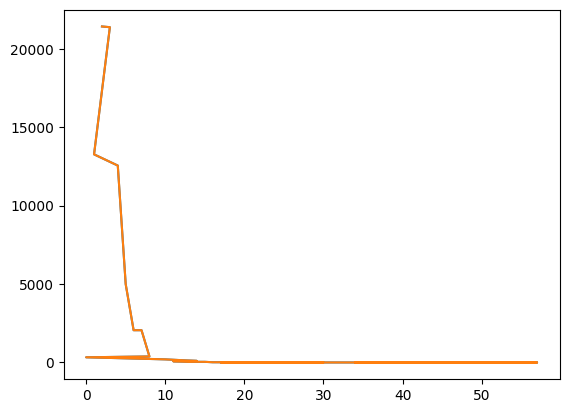

In [20]:
plt.plot(stay_resort)
plt.plot(stay_city)